In [1]:
# Import Premiums data.
Premium <- read.csv("/content/Premiums.csv")

In [9]:
# Obtain the Mode for the count of policies available across each Zone.

# Define a function to get the mode.
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Count policies by Zone and find the mode
policy_count <- table(Premium$ZONE_NAME)
mode <- get_mode(policy_count)
mode


[1] 99

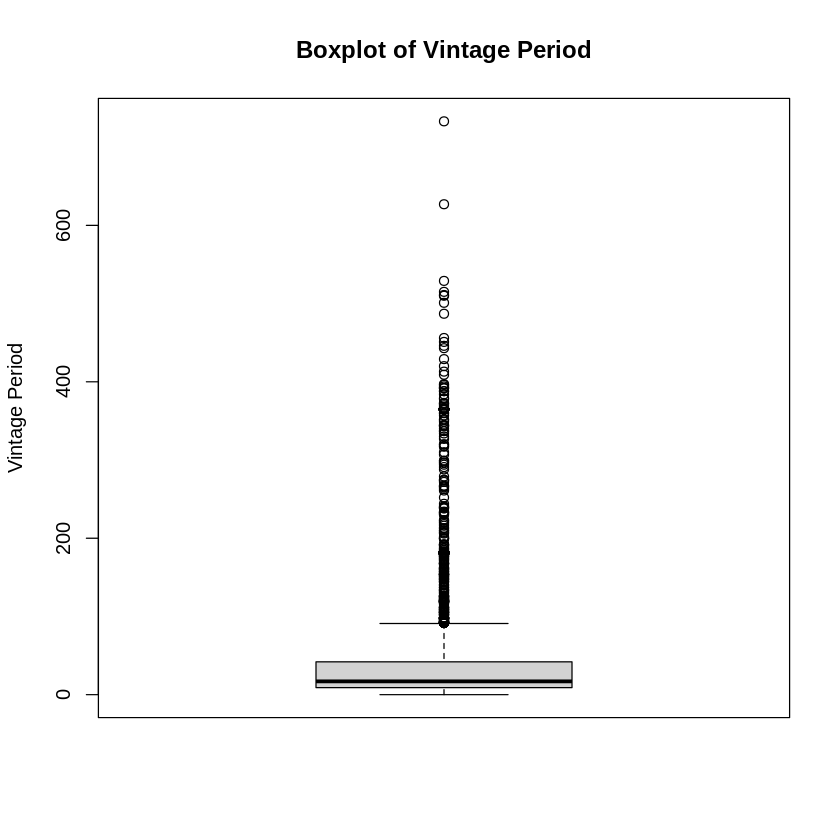

In [12]:
# Obtain box-whisker plots for Vintage period.

boxplot(Premium$Vintage_Period, main="Boxplot of Vintage Period", ylab="Vintage Period")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



[1] 4280  761  995 1796 4295 3534 1869 3309 3954  661

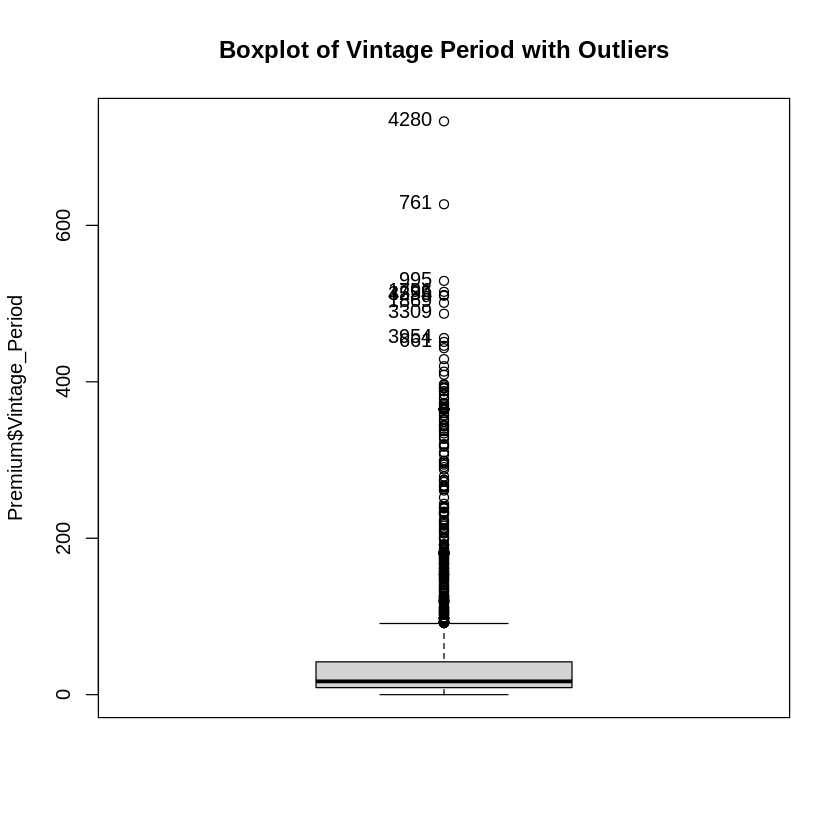

In [14]:
# Detect outliers if present. Hint: use Boxplot() function of ‘car’ Package
install.packages("car")
library(car)

# Boxplot with outlier detection for Vintage period
Boxplot(Premium$Vintage_Period, main="Boxplot of Vintage Period with Outliers")

In [22]:
# Find skewness and kurtosis of Premium amount by Zone.

install.packages("e1071")
library(e1071)

f <- function(x)c(skew = skewness(x,type = 2),kurt = kurtosis(x,type = 2))
aggregate(Premium~ZONE_NAME,data = Premium,FUN = f)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ZONE_NAME,Premium
<chr>,"<dbl[,2]>"
East,"3.200992, 12.59642"
North,"4.129702, 28.72507"
South,"3.927349, 22.88973"


In [21]:
# Alternative
skewness_by_zone <- tapply(Premium$Premium, Premium$ZONE_NAME, skewness)
kurtosis_by_zone <- tapply(Premium$Premium, Premium$ZONE_NAME, kurtosis)

print(skewness_by_zone)
print(kurtosis_by_zone)

    East    North    South 
3.104645 4.123544 3.922877 
    East    North    South 
11.60950 28.61925 22.82441 


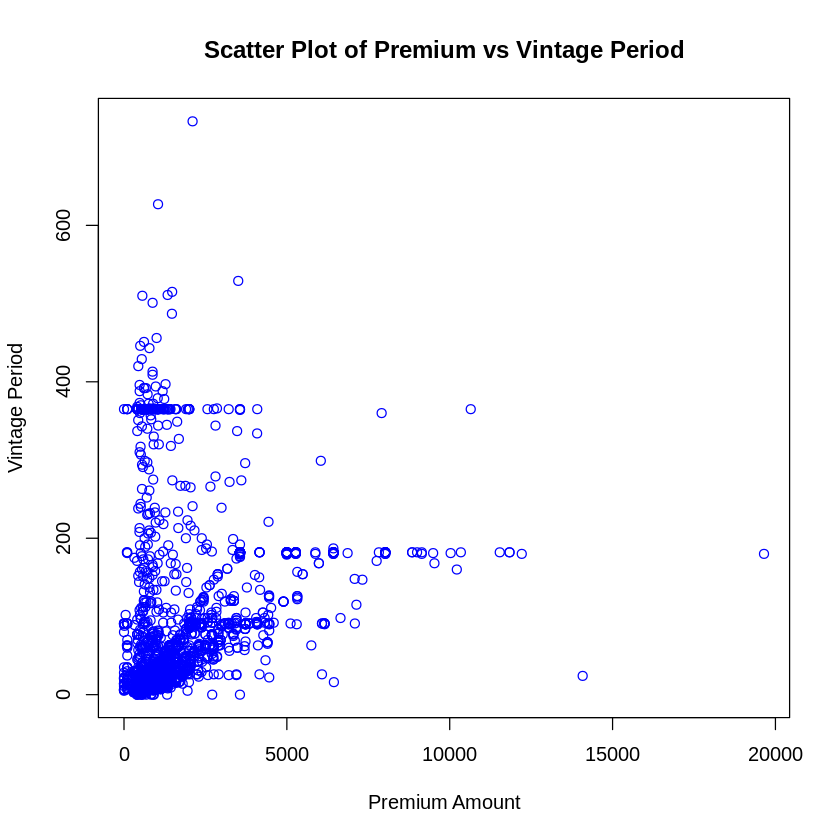

In [27]:
# Draw a scatter plot of Premium and Vintage period.

plot(Premium$Premium, Premium$Vintage_Period,
     main="Scatter Plot of Premium vs Vintage Period",
     xlab="Premium Amount", ylab="Vintage Period", col="blue")


In [30]:
#Find the correlation coefficient between Premium and Vintage period and interpret the value.

correlation_coeff <- cor(Premium$Premium, Premium$Vintage_Period)
correlation_coeff


[1] 0.3641487